In [143]:
from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math


In [144]:
def print_sample(sample):
    for i, j in enumerate(sample):
        if i%10 == 0:
            print()
        print(j, end = ' ')
    print()

In [145]:
f = open("sample.txt", "r")
data = [float(x) for x in f.read().split()]
print_sample(data)



4.58 3.18 2.83 -0.17 5.34 3.75 1.86 2.9 -0.49 11.05 
-0.58 19.24 -0.55 5.53 4.42 -0.52 7.71 3.0 2.35 3.01 
1.12 11.5 1.67 -0.21 1.1 -0.16 1.78 0.79 2.88 2.96 
1.42 1.51 -0.28 1.76 5.58 13.5 0.56 8.44 4.13 -0.07 
0.86 6.89 7.18 1.08 1.31 1.81 0.91 0.62 1.84 1.6 
0.49 1.13 1.43 9.33 8.03 0.59 1.17 4.29 3.31 21.05 
8.85 8.18 10.03 3.91 6.72 0.46 0.76 15.48 3.0 -0.65 
2.32 0.39 2.76 4.82 -0.38 14.09 4.97 1.04 2.36 8.54 
3.24 11.34 5.23 3.23 -0.22 3.39 14.02 0.44 0.36 0.08 
3.47 -0.18 0.62 -0.35 0.95 7.79 0.14 3.9 -0.63 5.47 


In [146]:
sum(data)

373.2800000000001

## Згенеруємо Latex-код для відсортованої вибірки

In [147]:
sorted_data = sorted(data)
for i, j in enumerate(sorted_data):
    if i%10 == 0:
        if j >= 0:
            print("\\\\")
        else:
            print()
        if j!= 0:
            print("\\ttfamily", end = ' ')
    
    print(j, end = ' ')
    if i!=len(sorted_data)-1:
        print('&', end = ' ')


\ttfamily -0.65 & -0.63 & -0.58 & -0.55 & -0.52 & -0.49 & -0.38 & -0.35 & -0.28 & -0.22 & 
\ttfamily -0.21 & -0.18 & -0.17 & -0.16 & -0.07 & 0.08 & 0.14 & 0.36 & 0.39 & 0.44 & \\
\ttfamily 0.46 & 0.49 & 0.56 & 0.59 & 0.62 & 0.62 & 0.76 & 0.79 & 0.86 & 0.91 & \\
\ttfamily 0.95 & 1.04 & 1.08 & 1.1 & 1.12 & 1.13 & 1.17 & 1.31 & 1.42 & 1.43 & \\
\ttfamily 1.51 & 1.6 & 1.67 & 1.76 & 1.78 & 1.81 & 1.84 & 1.86 & 2.32 & 2.35 & \\
\ttfamily 2.36 & 2.76 & 2.83 & 2.88 & 2.9 & 2.96 & 3.0 & 3.0 & 3.01 & 3.18 & \\
\ttfamily 3.23 & 3.24 & 3.31 & 3.39 & 3.47 & 3.75 & 3.9 & 3.91 & 4.13 & 4.29 & \\
\ttfamily 4.42 & 4.58 & 4.82 & 4.97 & 5.23 & 5.34 & 5.47 & 5.53 & 5.58 & 6.72 & \\
\ttfamily 6.89 & 7.18 & 7.71 & 7.79 & 8.03 & 8.18 & 8.44 & 8.54 & 8.85 & 9.33 & \\
\ttfamily 10.03 & 11.05 & 11.34 & 11.5 & 13.5 & 14.02 & 14.09 & 15.48 & 19.24 & 21.05 

## Підрахуємо к-ть унікальних значень вибірки

In [148]:
print_sample(np.unique(data))
print()
print('Length of sample: ', len(data))
print('Unique values: ', len(np.unique(data)))


-0.65 -0.63 -0.58 -0.55 -0.52 -0.49 -0.38 -0.35 -0.28 -0.22 
-0.21 -0.18 -0.17 -0.16 -0.07 0.08 0.14 0.36 0.39 0.44 
0.46 0.49 0.56 0.59 0.62 0.76 0.79 0.86 0.91 0.95 
1.04 1.08 1.1 1.12 1.13 1.17 1.31 1.42 1.43 1.51 
1.6 1.67 1.76 1.78 1.81 1.84 1.86 2.32 2.35 2.36 
2.76 2.83 2.88 2.9 2.96 3.0 3.01 3.18 3.23 3.24 
3.31 3.39 3.47 3.75 3.9 3.91 4.13 4.29 4.42 4.58 
4.82 4.97 5.23 5.34 5.47 5.53 5.58 6.72 6.89 7.18 
7.71 7.79 8.03 8.18 8.44 8.54 8.85 9.33 10.03 11.05 
11.34 11.5 13.5 14.02 14.09 15.48 19.24 21.05 

Length of sample:  100
Unique values:  98


In [149]:
print(sorted_data)

[-0.65, -0.63, -0.58, -0.55, -0.52, -0.49, -0.38, -0.35, -0.28, -0.22, -0.21, -0.18, -0.17, -0.16, -0.07, 0.08, 0.14, 0.36, 0.39, 0.44, 0.46, 0.49, 0.56, 0.59, 0.62, 0.62, 0.76, 0.79, 0.86, 0.91, 0.95, 1.04, 1.08, 1.1, 1.12, 1.13, 1.17, 1.31, 1.42, 1.43, 1.51, 1.6, 1.67, 1.76, 1.78, 1.81, 1.84, 1.86, 2.32, 2.35, 2.36, 2.76, 2.83, 2.88, 2.9, 2.96, 3.0, 3.0, 3.01, 3.18, 3.23, 3.24, 3.31, 3.39, 3.47, 3.75, 3.9, 3.91, 4.13, 4.29, 4.42, 4.58, 4.82, 4.97, 5.23, 5.34, 5.47, 5.53, 5.58, 6.72, 6.89, 7.18, 7.71, 7.79, 8.03, 8.18, 8.44, 8.54, 8.85, 9.33, 10.03, 11.05, 11.34, 11.5, 13.5, 14.02, 14.09, 15.48, 19.24, 21.05]


In [150]:
Exi = sum(sorted_data)/100
Exi

3.7328

In [151]:
Dxi_unbiased =  round(sum([(i - Exi)**2 for i in sorted_data])/99, 8)
Dxi_unbiased

19.57069309

In [152]:
Dxi =  round(sum([(i - Exi)**2 for i in sorted_data])/100, 10)
print('Dxi = ', Dxi)

Dxi =  19.37498616


In [153]:
Asxi = round(sum([(i - Exi)**3 for i in sorted_data]) /(100 * (Dxi)**(3/2)),8)
Asxi

1.68780445

## Згенеруємо Latex-код для позначення інтервалів

In [154]:
def find_intervals(start,stop, step):
    float_range_array = np.arange(start, stop, step)
    range_list =[round(i, 2) for i in list(float_range_array)]
    
    for j, i in enumerate(range_list):
        print('\\Delta_{',j+1, '} &=[',round(i, 2), ', ',round(i+step, 2),')', end = ' ')
        if j%2 == 0 and j!=len(range_list)-1:
            print(' & ', end = ' ')
        elif j%2 == 1:
            print('\\\\')
    range_list.append(stop)
    return range_list
            

In [155]:
pre_intervals = find_intervals(-0.65, 21.05, 2.17)

\Delta_{ 1 } &=[ -0.65 ,  1.52 )  &  \Delta_{ 2 } &=[ 1.52 ,  3.69 ) \\
\Delta_{ 3 } &=[ 3.69 ,  5.86 )  &  \Delta_{ 4 } &=[ 5.86 ,  8.03 ) \\
\Delta_{ 5 } &=[ 8.03 ,  10.2 )  &  \Delta_{ 6 } &=[ 10.2 ,  12.37 ) \\
\Delta_{ 7 } &=[ 12.37 ,  14.54 )  &  \Delta_{ 8 } &=[ 14.54 ,  16.71 ) \\
\Delta_{ 9 } &=[ 16.71 ,  18.88 )  &  \Delta_{ 10 } &=[ 18.88 ,  21.05 ) \\


## Знайдемо частоти для побудови варіаційного ряду

In [156]:
d = dict()
for i in sorted_data:
    if not i in d.keys():
        d.update({i : 1})
    else:
        d[i] += 1
print(d)

{-0.65: 1, -0.63: 1, -0.58: 1, -0.55: 1, -0.52: 1, -0.49: 1, -0.38: 1, -0.35: 1, -0.28: 1, -0.22: 1, -0.21: 1, -0.18: 1, -0.17: 1, -0.16: 1, -0.07: 1, 0.08: 1, 0.14: 1, 0.36: 1, 0.39: 1, 0.44: 1, 0.46: 1, 0.49: 1, 0.56: 1, 0.59: 1, 0.62: 2, 0.76: 1, 0.79: 1, 0.86: 1, 0.91: 1, 0.95: 1, 1.04: 1, 1.08: 1, 1.1: 1, 1.12: 1, 1.13: 1, 1.17: 1, 1.31: 1, 1.42: 1, 1.43: 1, 1.51: 1, 1.6: 1, 1.67: 1, 1.76: 1, 1.78: 1, 1.81: 1, 1.84: 1, 1.86: 1, 2.32: 1, 2.35: 1, 2.36: 1, 2.76: 1, 2.83: 1, 2.88: 1, 2.9: 1, 2.96: 1, 3.0: 2, 3.01: 1, 3.18: 1, 3.23: 1, 3.24: 1, 3.31: 1, 3.39: 1, 3.47: 1, 3.75: 1, 3.9: 1, 3.91: 1, 4.13: 1, 4.29: 1, 4.42: 1, 4.58: 1, 4.82: 1, 4.97: 1, 5.23: 1, 5.34: 1, 5.47: 1, 5.53: 1, 5.58: 1, 6.72: 1, 6.89: 1, 7.18: 1, 7.71: 1, 7.79: 1, 8.03: 1, 8.18: 1, 8.44: 1, 8.54: 1, 8.85: 1, 9.33: 1, 10.03: 1, 11.05: 1, 11.34: 1, 11.5: 1, 13.5: 1, 14.02: 1, 14.09: 1, 15.48: 1, 19.24: 1, 21.05: 1}


In [157]:
pre_intervals

[-0.65, 1.52, 3.69, 5.86, 8.03, 10.2, 12.37, 14.54, 16.71, 18.88, 21.05]

In [158]:
def count_freq(intervals, sample_dict):
    intervals = list(zip(intervals[:-1],intervals[1:]))
    freq_dict = dict.fromkeys(intervals, 0)
    for i in intervals:
        for j in d.keys():
            if j>= i[0] and j<i[1]:
                freq_dict[i] += d[j]
            elif j>= i[0] and i[1]==intervals[-1][1]:
                freq_dict[i] += d[j]
    return freq_dict, intervals
#     for i in sample_dict.values()

In [159]:
freq_dict, intervals = count_freq(pre_intervals, d)
freq_dict

{(-0.65, 1.52): 41,
 (1.52, 3.69): 24,
 (3.69, 5.86): 14,
 (5.86, 8.03): 5,
 (8.03, 10.2): 7,
 (10.2, 12.37): 3,
 (12.37, 14.54): 3,
 (14.54, 16.71): 1,
 (16.71, 18.88): 0,
 (18.88, 21.05): 2}

In [160]:
sum(list(freq_dict.values()))

100

In [161]:
intervals

[(-0.65, 1.52),
 (1.52, 3.69),
 (3.69, 5.86),
 (5.86, 8.03),
 (8.03, 10.2),
 (10.2, 12.37),
 (12.37, 14.54),
 (14.54, 16.71),
 (16.71, 18.88),
 (18.88, 21.05)]

## Знайдемо накопичені частості

In [162]:
list(freq_dict.values())

[41, 24, 14, 5, 7, 3, 3, 1, 0, 2]

In [163]:
[(j + sum(list(freq_dict.values())[:i]))/100 for i,j in enumerate(list(freq_dict.values()))]

[0.41, 0.65, 0.79, 0.84, 0.91, 0.94, 0.97, 0.98, 0.98, 1.0]

In [164]:
def compute_ivr(freq_dict):
    accum_freq = [(j + sum(list(freq_dict.values())[:i]))/100 for i,j in enumerate(list(freq_dict.values()))]
    k=0
    for i,j in zip(freq_dict.keys(), freq_dict.values()):
        freq_dict[i] = [j, j/100, accum_freq[k]]
        k=k+1
    return freq_dict

In [165]:
compute_ivr(freq_dict)

{(-0.65, 1.52): [41, 0.41, 0.41],
 (1.52, 3.69): [24, 0.24, 0.65],
 (3.69, 5.86): [14, 0.14, 0.79],
 (5.86, 8.03): [5, 0.05, 0.84],
 (8.03, 10.2): [7, 0.07, 0.91],
 (10.2, 12.37): [3, 0.03, 0.94],
 (12.37, 14.54): [3, 0.03, 0.97],
 (14.54, 16.71): [1, 0.01, 0.98],
 (16.71, 18.88): [0, 0.0, 0.98],
 (18.88, 21.05): [2, 0.02, 1.0]}

## Згенеруємо Latex-код для побудови ІВР

In [166]:
def print_ivr(freq_dict):
    name = ['n_{i}','\omega_{i}', '\omega_{i}^{H}']
    for j in range(3):
        print('\hline', name[j], end=' ')
        for i in freq_dict.values():
            print(' &',i[j], end = '')
        print('\\\\')
    print('\hline')
    

In [167]:
print_ivr(freq_dict)

\hline n_{i}  & 41 & 24 & 14 & 5 & 7 & 3 & 3 & 1 & 0 & 2\\
\hline \omega_{i}  & 0.41 & 0.24 & 0.14 & 0.05 & 0.07 & 0.03 & 0.03 & 0.01 & 0.0 & 0.02\\
\hline \omega_{i}^{H}  & 0.41 & 0.65 & 0.79 & 0.84 & 0.91 & 0.94 & 0.97 & 0.98 & 0.98 & 1.0\\
\hline


## Гістограма

In [168]:
fr = [i[1] for i in list(freq_dict.values())]
fr

[0.41, 0.24, 0.14, 0.05, 0.07, 0.03, 0.03, 0.01, 0.0, 0.02]

In [169]:
h = [i/2.17 for i in fr]
print(h)

[0.1889400921658986, 0.11059907834101382, 0.06451612903225808, 0.02304147465437788, 0.03225806451612904, 0.013824884792626727, 0.013824884792626727, 0.004608294930875576, 0.0, 0.009216589861751152]


In [170]:
print('\\begin{aligned}')
for i,j in enumerate(h):
    print('& h_{',i+1,'} = \\frac{',fr[i],'}{2.17}=',j,end='')
    if i <len(h)-1:
        print('\\\\')
    else: print()
print('\end{aligned}')

\begin{aligned}
& h_{ 1 } = \frac{ 0.41 }{2.17}= 0.1889400921658986\\
& h_{ 2 } = \frac{ 0.24 }{2.17}= 0.11059907834101382\\
& h_{ 3 } = \frac{ 0.14 }{2.17}= 0.06451612903225808\\
& h_{ 4 } = \frac{ 0.05 }{2.17}= 0.02304147465437788\\
& h_{ 5 } = \frac{ 0.07 }{2.17}= 0.03225806451612904\\
& h_{ 6 } = \frac{ 0.03 }{2.17}= 0.013824884792626727\\
& h_{ 7 } = \frac{ 0.03 }{2.17}= 0.013824884792626727\\
& h_{ 8 } = \frac{ 0.01 }{2.17}= 0.004608294930875576\\
& h_{ 9 } = \frac{ 0.0 }{2.17}= 0.0\\
& h_{ 10 } = \frac{ 0.02 }{2.17}= 0.009216589861751152
\end{aligned}


In [171]:
# сумарна площа прямокутників повинна дорівнювати 1
sum(h) * 2.17 

1.0

In [172]:
print('(', end='')
for i in h:
    if i!= h[-1]:
        print (i, "+", end='')
    else: print(h[-1],') * d_{i}=', sum(h), '* 2.17=', sum(h) * 2.17)

(0.1889400921658986 +0.11059907834101382 +0.06451612903225808 +0.02304147465437788 +0.03225806451612904 +0.013824884792626727 +0.013824884792626727 +0.004608294930875576 +0.0 +0.009216589861751152 ) * d_{i}= 0.4608294930875576 * 2.17= 1.0


In [173]:
np.array(sorted_data).shape

(100,)

In [174]:
np.array(h).shape

(10,)

In [175]:
counts, bins = np.histogram(sorted_data)
print(counts, bins)

[41 24 14  5  7  3  3  1  0  2] [-0.65  1.52  3.69  5.86  8.03 10.2  12.37 14.54 16.71 18.88 21.05]


In [176]:
def pdf_exp(lamb, x):
    if x>=0:
        return lamb * np.exp(-lamb*x)
    else: return 0

In [177]:
intervals

[(-0.65, 1.52),
 (1.52, 3.69),
 (3.69, 5.86),
 (5.86, 8.03),
 (8.03, 10.2),
 (10.2, 12.37),
 (12.37, 14.54),
 (14.54, 16.71),
 (16.71, 18.88),
 (18.88, 21.05)]

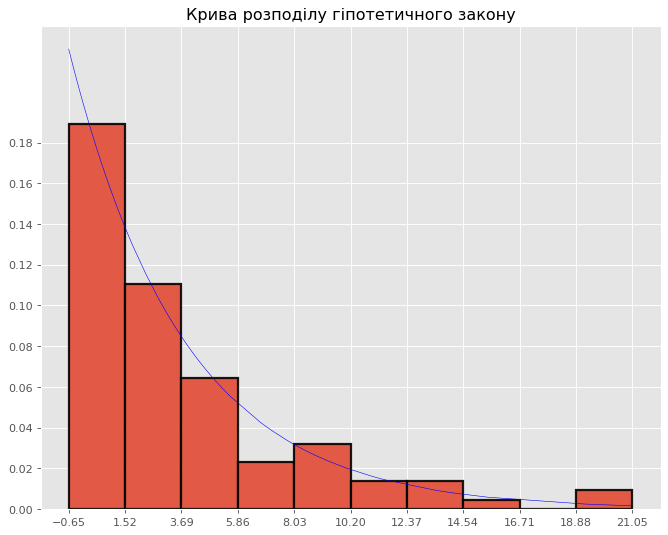

In [188]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# plt.rcParams["figure.figsize"] = (8,5.5)
plt.style.use('ggplot')
plt.hist(bins[:-1], bins, weights=h, alpha=0.9, edgecolor='black', linewidth=2) # label='Value'
plt.title('Крива розподілу гіпотетичного закону')
plt.yticks(np.arange(0, 0.2, 0.02))
plt.xticks(pre_intervals)
#plt.plot(bins[:-1]+2.17/2, h, color='blue')
lamb = -0.65
a = 4.4271
np.arange(0, 22, 0.5)
def shifted_exp_pdf(lamb, a, x):
    return (1/lamb )* np.exp((-1/lamb)*(x-a))
plt.plot(np.array(sorted_data), shifted_exp_pdf(4.4271,-0.65, np.array(sorted_data)), 'b', linewidth=0.5)
plt.savefig('hyp_exp.png', dpi = 300)
plt.show()

In [179]:
def shifted_exp(lamb, a, x):
    return (1/lamb )* np.exp((-1/lamb)*(x-a))
x = np.arange(-0.65, 22, 0.5)
shifted_exp(4.4271,-0.65, x)

array([0.2258815 , 0.20175817, 0.18021112, 0.16096521, 0.14377471,
       0.12842008, 0.11470528, 0.10245516, 0.09151332, 0.08174002,
       0.07301048, 0.06521322, 0.05824869, 0.05202793, 0.04647154,
       0.04150854, 0.03707558, 0.03311604, 0.02957937, 0.0264204 ,
       0.02359879, 0.02107853, 0.01882741, 0.01681671, 0.01502075,
       0.01341659, 0.01198374, 0.01070392, 0.00956078, 0.00853972,
       0.00762771, 0.0068131 , 0.00608549, 0.00543558, 0.00485508,
       0.00433657, 0.00387344, 0.00345977, 0.00309028, 0.00276025,
       0.00246547, 0.00220216, 0.00196698, 0.00175691, 0.00156928,
       0.00140169])

In [180]:
acc_freq = [i[2] for i in list(freq_dict.values())]
acc_freq

[0.41, 0.65, 0.79, 0.84, 0.91, 0.94, 0.97, 0.98, 0.98, 1.0]

In [181]:
def empiric_distr(x, intervals, acc_freq):
    if x <= -0.65:
        return 0
    elif x> 18.88:
        return 1
    else:
        for (i, j), z in zip(intervals, acc_freq):
            if i < x <= j: return z
        

In [182]:
empiric_distr(-2.5, intervals, acc_freq)

0

In [183]:
pre_intervals

[-0.65, 1.52, 3.69, 5.86, 8.03, 10.2, 12.37, 14.54, 16.71, 18.88, 21.05]

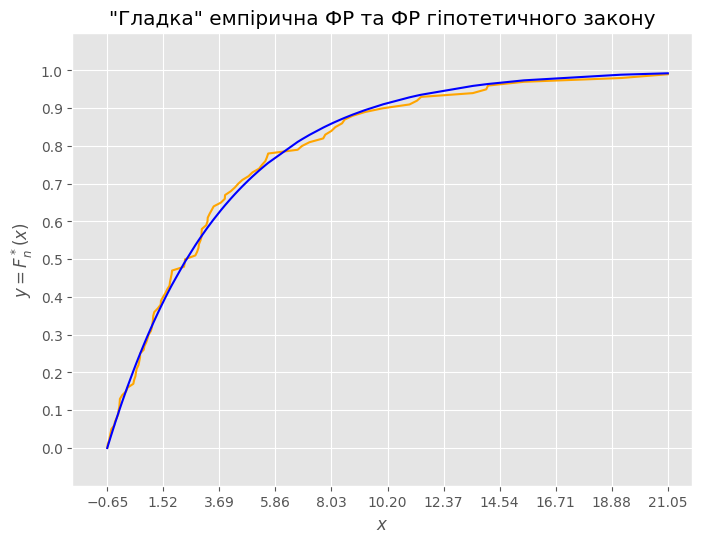

In [204]:
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

# plt.plot([-2, -0.65], [empiric_distr(-0.65, intervals, acc_freq), 
#                              empiric_distr(-0.65, intervals, acc_freq)], color = 'b')
# for x1, x2 in intervals[:-1]:
#         plt.plot([x1, x2], [empiric_distr(x2,intervals, acc_freq), 
#                              empiric_distr(x2,intervals, acc_freq)],
#                      color = 'b')
# plt.plot([18.88,22], [empiric_distr(22, intervals, acc_freq), 
#                              empiric_distr(22, intervals, acc_freq)], color = 'b')
        
# for i in pre_intervals:
#     plt.plot([i, i], [empiric_distr(i, intervals, acc_freq), 
#                       empiric_distr(i + 2.07, intervals, acc_freq)], color='black', linestyle='dotted')
    
# pre_intervals.remove(16.71)    
# plt.scatter(pre_intervals[:-1], [empiric_distr(i+ 2.07, intervals, acc_freq) for i in pre_intervals[:-1]], 
#             marker = '<', color = 'b')
# pre_intervals.append(16.71)
# pre_intervals = list(sorted(pre_intervals))

plt.xticks(pre_intervals)
plt.yticks([i for i in np.arange(0.0, 1.1, 0.1)])
plt.axis([-2, 22, -0.1, 1.1])
plt.title('"Гладка" емпiрична ФР та ФР гiпотетичного закону')
plt.ylabel('$y = F_n^*(x)$')
plt.xlabel('$x$')
# plt.plot(np.array(pre_intervals[1:])-2.17/2, [empiric_distribution(i, intervals, acc_freq)
#                                           for i in np.array(pre_intervals[1:])-2.17/2], color='red')
# plt.plot([-0.65, -0.65+2.17/2],[empiric_distribution(i, intervals, acc_freq)
#                                           for i in [-0.65, -0.65+2.17/2]], color='red' )

plt.plot(sorted_data,[i/100 for i,j in enumerate(sorted_data)], color = 'orange')
def shifted_exp_cdf(lamb, a, x):
    return 1 - np.exp((-1/lamb)*(x-a))
plt.plot(np.array(sorted_data), shifted_exp_cdf(4.4271,-0.65, np.array(sorted_data)), 'b', linewidth=1.5)
plt.savefig('hyp_exp_smoothed.png', dpi = 300)
# plt_plot(sorted_data)

plt.show()



In [510]:
pre_intervals

[-0.65, 1.52, 3.69, 5.86, 8.03, 10.2, 12.37, 14.54, 16.71, 18.88, 21.05]

In [514]:
np.array(pre_intervals)+2.17/2

array([ 0.435,  2.605,  4.775,  6.945,  9.115, 11.285, 13.455, 15.625,
       17.795, 19.965, 22.135])

In [205]:
pre_intervals

[-0.65, 1.52, 3.69, 5.86, 8.03, 10.2, 12.37, 14.54, 16.71, 18.88, 21.05]

In [217]:
# def prob_smoothed_ex((lamb, a, x):
#     return 1 - np.exp((-1/lamb)*(x-a))

prob = [ round(i, 4) for i in shifted_exp_cdf(4.4271,-0.65, np.array(pre_intervals))]
prob

[0.0,
 0.3875,
 0.6248,
 0.7702,
 0.8592,
 0.9138,
 0.9472,
 0.9676,
 0.9802,
 0.9879,
 0.9926]

In [231]:
round(prob[3]-prob[2],4)

0.1454

In [232]:
round(1-prob[3],4)

0.2298

In [243]:
r = [round(prob[i+1]-prob[i],4) for i in range(3)]
r.append(round(1-prob[3],4))
sum(r)

1.0

In [247]:
form1 = lambda ni, npi: (ni-npi)**2/npi

In [248]:
ni = np.array([41, 24, 14, 21 ])
npi = np.array([ 38.75, 23.73,14.54, 22.98 ])

In [249]:
form1(ni, npi)

array([0.13064516, 0.00307206, 0.02005502, 0.17060052])

In [252]:
round(sum(form1(ni, npi)),8)

0.32437276